<a href="https://colab.research.google.com/github/ChipVi/RFM-Analysis/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USING RFM ANALYSIS TO CATEGORIZE LOYAL CUSTOMERS

**PREPROCESSING**

In [ ]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/CUSTOMER CLASSIFICATION ON RFM/online_retail_II.xlsx")

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Filter NULL Rows**

In [ ]:
data= data[pd.notnull(data['Customer ID'])]

In [ ]:
filtered_data=data[['Country','Customer ID']].drop_duplicates()

<Axes: >

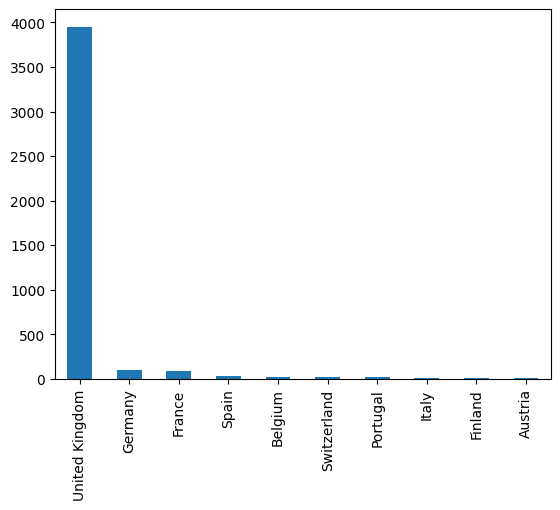

In [ ]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

**Analysis on UK customers**

In [ ]:
uk_data=data[data.Country=='United Kingdom']


In [ ]:
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   Price        361878 non-null  float64       
 6   Customer ID  361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [ ]:
uk_data.describe()

,Quantity,Price,Customer ID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
uk_data = uk_data[(uk_data['Quantity']>0)]


In [ ]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   Price        354345 non-null  float64       
 6   Customer ID  354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


**Filter Columns needed for Calculations**

In [ ]:
uk_data=uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price']]


In [ ]:
uk_data_copy = uk_data.copy()
uk_data_copy['TotalPrice'] = uk_data_copy['Quantity'] * uk_data_copy['Price']


In [ ]:
uk_data_copy['InvoiceDate'].min(),uk_data_copy['InvoiceDate'].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [ ]:
uk_data=uk_data_copy


In [ ]:
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])
uk_data.head()

,Customer ID,InvoiceDate,Invoice,Quantity,Price,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


# **Calculate RFM**

Recency: Present Day - last Purchase

Frequency: Number of Invoice

Money: TotalPrice

In [ ]:
PRESENT = dt.datetime(2011,12,10)

In [ ]:
rfm= uk_data.groupby('Customer ID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'Invoice': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})


In [ ]:
rfm.columns=['Recency', 'Frequency', 'Money']
rfm.head()

,Recency,Frequency,Money
Customer ID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [ ]:
rfm['Recency'] = rfm['Recency'].astype(int)


**Bin data in each column into 4 quartiles relatively to 4 levels: from Highest (1) to Lowest(4)**

In [ ]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['Money'], 4, ['4','3','2','1'])


In [ ]:
rfm.head()

,Recency,Frequency,Money,r_quartile,f_quartile,m_quartile
Customer ID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


**Combine the score in each column into 1 score**


In [ ]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
columns_to_drop = ['r_quartile','m_quartile','f_quartile']
rfm = rfm.drop(columns=columns_to_drop)
rfm.head()


,Recency,Frequency,Money,RFM_Score
Customer ID,,,,
12346.0,325,1,77183.60,441
12747.0,2,103,4196.01,111
12748.0,0,4596,33719.73,111
12749.0,3,199,4090.88,111
12820.0,3,59,942.34,122


# RESULT - TARGETED CUSTOMERS

In [ ]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111']


,Recency,Frequency,Money,RFM_Score
Customer ID,,,,
12747.0,2,103,4196.01,111
12748.0,0,4596,33719.73,111
12749.0,3,199,4090.88,111
12839.0,2,314,5591.42,111
12841.0,4,420,4022.35,111
...,...,...,...,...
18229.0,11,164,7276.90,111
18241.0,9,104,2073.09,111
18245.0,7,175,2567.06,111
